In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer, fetch_california_housing, load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr, pearsonr

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


from sklearn.manifold import TSNE



In [4]:
path_info = "C:/Users/46705/Documents/SpiderSilk/data/annotations/majorSpecific.genes.DEseq.PLS.tpm.part.info.csv"
path_gland = "C:/Users/46705/Documents/SpiderSilk/data/annotations/majorSpecific.genes.DEseq.PLS.tpm.part.csv"

path_df = "C:/Users/46705/Documents/SpiderSilk/data/pre_filtering/all_annotated_lascID.csv"

# df_anno = pd.read_csv(path_anno, sep= ",")
# df_sp = pd.read_csv(path_sp, sep= ",")
info = pd.read_csv(path_info, sep= ",")
data  = pd.read_csv(path_gland, sep= ",")

df  = pd.read_csv(path_df, sep= ",")

C:\Users\46705\AppData\Local\Temp\ipykernel_15772\923427359.py:11: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,162,163,164,165,166,167,168,169,171,172,173,174,175,176,177,178,179,180,182,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265

In [5]:
data

,gene_id,geneName,lascID,product,uniprot_id,MajorParts,Body_FC,Body_padj,Gland_FC,Gland_padj,...,Body_vs_Head,MajorGland_vs_Body,AmpullateGlands_vs_OtherGlands,Selection,Duct,Major,Sac,Tail,geneNameProtein,Group
0,augustus_masked-000031F-processed-gene-28.6,acp7,LASC004110,Acid phosphatase type 7,A5D6U8,Duct,1.070914,2.394206e-05,1.284837,0.125582,...,0.010678,0.011387,0.016418,MajorSpecific,873.253308,806.862752,842.819496,341.803451,NaN,NaN
1,augustus_masked-000043F-processed-gene-9.2,LASC004993,LASC004993,hypothetical protein,NaN,Duct,6.991497,7.516849e-27,2.182390,0.030081,...,0.011421,0.013278,0.024495,MajorSpecific,841.053778,460.140854,554.299274,1.171070,NaN,NaN
2,augustus_masked-000046F-processed-gene-9.3,inhba,LASC005233,Inhibin beta A chain,P27092,Duct,3.240174,1.091179e-03,2.974858,0.003305,...,0.008597,0.014337,0.028438,MajorSpecific,170.010869,92.640580,66.733772,29.832328,NaN,NaN
3,augustus_masked-000059F-processed-gene-26.5,LASC006407,LASC006407,hypothetical protein,NaN,Duct,6.050172,3.127650e-05,1.605687,0.112351,...,0.010431,0.012900,0.022767,MajorSpecific,12.683638,3.227238,3.343054,0.038391,NaN,NaN
4,augustus_masked-000088F-processed-gene-12.10,nifk,LASC008425,MKI67 FHA domain-interacting nucleolar phospho...,Q6GL69,Tail,0.530167,4.176563e-03,1.342355,0.000003,...,0.009516,0.014210,0.010875,MajorSpecific,892.300533,506.885008,305.323485,538.680256,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,maker-000579F-est_gff_StringTie-gene-0.1,btbd6_klhl6,NaN,"BTB/POZ domain-containing protein 6,Kelch-like...",NaN,Sac,0.991477,6.012891e-07,0.025856,0.965632,...,0.010873,0.006847,0.028183,MajorSpecific,44.987744,66.107777,65.870420,57.218176,NaN,NaN
898,maker-000581F-exonerate_protein2genome-gene-1.11,znf596,NaN,"Zinc finger protein 596,hypothetical protein",NaN,Tail,0.635253,7.244182e-02,0.217540,0.658591,...,0.007696,0.004886,0.010859,MajorSpecific,19.120070,23.244033,13.600578,19.943015,NaN,NaN
899,maker-000595F-est_gff_StringTie-gene-0.1,LASC022131,NaN,hypothetical protein,NaN,Duct,-0.149677,7.617254e-01,0.531565,0.115584,...,0.000253,0.009169,0.017784,MajorSpecific,13.425820,8.545646,6.265520,5.600456,NaN,NaN
900,maker-000684F-est_gff_StringTie-gene-0.6,eef1akmt2,NaN,EEF1A lysine methyltransferase 2,NaN,Tail,0.988659,5.296072e-04,0.944314,0.037841,...,0.010436,0.011011,0.020326,MajorSpecific,5.101252,6.716274,3.659425,7.333402,NaN,NaN


<Axes: ylabel='Sac'>

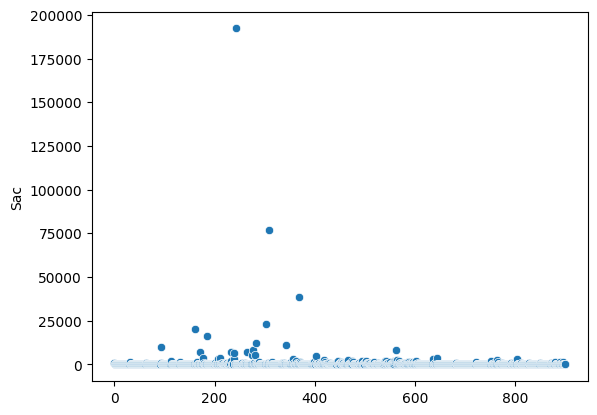

In [7]:
sns.scatterplot(data["Sac"])

c:\Users\46705\miniconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\46705\miniconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\46705\miniconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


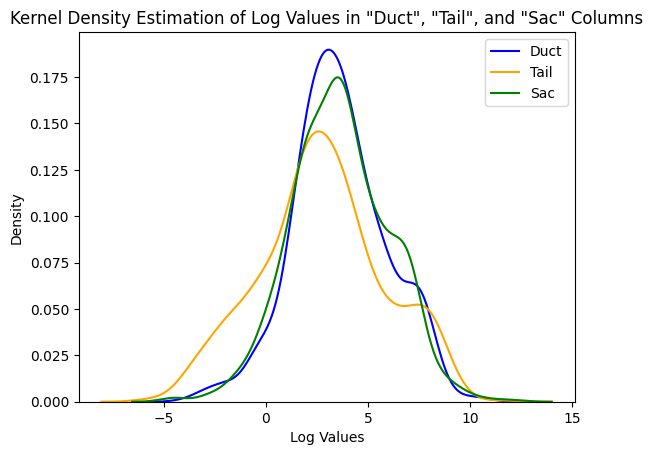

In [8]:

data['duct_log'] = np.log(data['Duct'])
data['tail_log'] = np.log(data['Tail'])
data['sac_log'] = np.log(data['Sac'])

sns.kdeplot(data=data['duct_log'], color='blue', label='Duct')
sns.kdeplot(data=data['tail_log'], color='orange', label='Tail')
sns.kdeplot(data=data['sac_log'], color='green', label='Sac')

plt.title('Kernel Density Estimation of Log Values in "Duct", "Tail", and "Sac" Columns')
plt.xlabel('Log Values')
plt.ylabel('Density')


plt.legend()
plt.show()



<Axes: xlabel='Major_FC', ylabel='Density'>

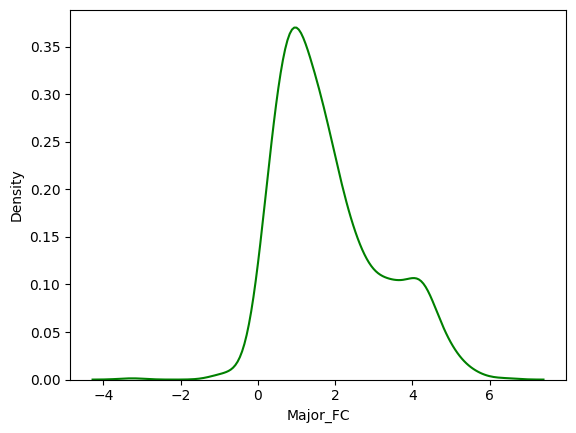

In [9]:
# sns.scatterplot(data["Major_FC"]) 
sns.kdeplot(data=data["Major_FC"], color='green', label='Sac')

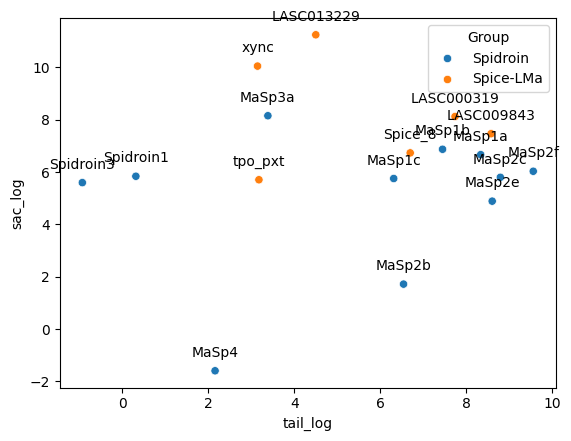

In [10]:


filtered_data = data.dropna(subset=['Group'])

sns.scatterplot(data=filtered_data, x="tail_log", y="sac_log", hue="Group")
for index, row in filtered_data.iterrows():
    plt.annotate(row['geneName'], (row['tail_log'], row['sac_log']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


186


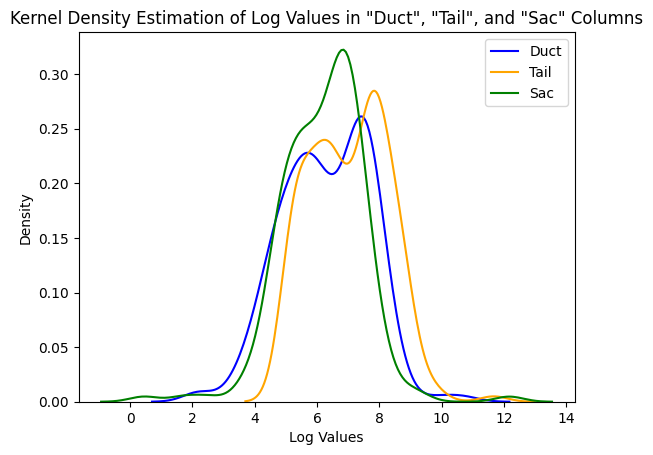

In [11]:

tail_log_threshold = 5
tail_log_high = data[data['tail_log'] > tail_log_threshold]

print(len(tail_log_high))
sns.kdeplot(data=tail_log_high['duct_log'], color='blue', label='Duct')
sns.kdeplot(data=tail_log_high['tail_log'], color='orange', label='Tail')
sns.kdeplot(data=tail_log_high['sac_log'], color='green', label='Sac')

plt.title('Kernel Density Estimation of Log Values in "Duct", "Tail", and "Sac" Columns')
plt.xlabel('Log Values')
plt.ylabel('Density')

plt.legend()

plt.show()



In [12]:
tail_log_high[tail_log_high["Group"]=="Spice-LMa"]
tail_log_high[tail_log_high["Group"]=="Spidroin"]


,gene_id,geneName,lascID,product,uniprot_id,MajorParts,Body_FC,Body_padj,Gland_FC,Gland_padj,...,Selection,Duct,Major,Sac,Tail,geneNameProtein,Group,duct_log,tail_log,sac_log
413,evm-000033F-processed-gene-24.21-GeneA,MaSp2c,LASC004269,"MaSp-f(1)#PRD27696.1, protein",PRD27696.1,Tail,5.140380,4.918044e-07,2.017728,0.178043,...,MajorSpecific,132.934779,1614.982892,329.812965,6574.589352,MaSp2c,Spidroin,4.889859,8.790967,5.798526
414,evm-000033F-processed-gene-24.21-GeneB,MaSp2b,LASC004267,"MaSp-f(1)#PRD27696.1, protein",PRD27696.1,Tail,6.450668,3.206444e-09,0.359975,0.842009,...,MajorSpecific,52.773725,377.169369,5.549736,691.657987,MaSp2b,Spidroin,3.966013,6.539092,1.713750
415,evm-000033F-processed-gene-27.15-GeneA,MaSp1a,LASC004271,"Major, ampullate, spidroin, 1, variant, 1, (Fr...",A0A2S2B4B0,Tail,5.495340,1.407602e-06,1.185709,0.443568,...,MajorSpecific,153.965936,1615.995581,784.732785,4160.313534,MaSp1a,Spidroin,5.036731,8.333346,6.665343
416,evm-000033F-processed-gene-27.15-GeneB,MaSp1b,LASC004273,"Major, ampullate, spidroin, 1, variant, 1, (Fr...",A0A2S2B4B0,Tail,6.459317,6.617532e-11,1.285609,0.408368,...,MajorSpecific,88.994520,997.197906,964.139699,1713.264451,MaSp1b,Spidroin,4.488575,7.446156,6.871236
417,evm-000033F-processed-gene-27.15-GeneC,MaSp1c,LASC004274,"Major, ampullate, spidroin, 1, variant, 1, (Fr...",A0A2S2B4B0,Tail,7.113765,3.159390e-12,1.046821,0.508290,...,MajorSpecific,9.359149,283.950750,315.112003,550.181041,MaSp1c,Spidroin,2.236354,6.310247,5.752928
531,maker-000175F-exonerate_protein2genome-gene-8....,MaSp2e,LASC012920,"Major, ampullate, spidroin, 2, variant, 2, (Fr...",A0A2S2B4G1,Tail,5.172539,4.631242e-06,1.374914,0.380366,...,MajorSpecific,244.494119,1412.551137,132.552210,5437.427970,MaSp2e,Spidroin,5.499191,8.601061,4.886977
532,maker-000175F-exonerate_protein2genome-gene-8....,MaSp2f,LASC012922,"Major, ampullate, spidroin, 2, variant, 2, (Fr...",A0A2S2B4G1,Tail,5.156587,8.374277e-07,2.088894,0.175544,...,MajorSpecific,278.070338,3149.735456,415.890221,14128.029087,MaSp2f,Spidroin,5.627874,9.555916,6.030421


In [13]:
tail_log_high[tail_log_high["Group"]=="Spidroin"]



,gene_id,geneName,lascID,product,uniprot_id,MajorParts,Body_FC,Body_padj,Gland_FC,Gland_padj,...,Selection,Duct,Major,Sac,Tail,geneNameProtein,Group,duct_log,tail_log,sac_log
413,evm-000033F-processed-gene-24.21-GeneA,MaSp2c,LASC004269,"MaSp-f(1)#PRD27696.1, protein",PRD27696.1,Tail,5.140380,4.918044e-07,2.017728,0.178043,...,MajorSpecific,132.934779,1614.982892,329.812965,6574.589352,MaSp2c,Spidroin,4.889859,8.790967,5.798526
414,evm-000033F-processed-gene-24.21-GeneB,MaSp2b,LASC004267,"MaSp-f(1)#PRD27696.1, protein",PRD27696.1,Tail,6.450668,3.206444e-09,0.359975,0.842009,...,MajorSpecific,52.773725,377.169369,5.549736,691.657987,MaSp2b,Spidroin,3.966013,6.539092,1.713750
415,evm-000033F-processed-gene-27.15-GeneA,MaSp1a,LASC004271,"Major, ampullate, spidroin, 1, variant, 1, (Fr...",A0A2S2B4B0,Tail,5.495340,1.407602e-06,1.185709,0.443568,...,MajorSpecific,153.965936,1615.995581,784.732785,4160.313534,MaSp1a,Spidroin,5.036731,8.333346,6.665343
416,evm-000033F-processed-gene-27.15-GeneB,MaSp1b,LASC004273,"Major, ampullate, spidroin, 1, variant, 1, (Fr...",A0A2S2B4B0,Tail,6.459317,6.617532e-11,1.285609,0.408368,...,MajorSpecific,88.994520,997.197906,964.139699,1713.264451,MaSp1b,Spidroin,4.488575,7.446156,6.871236
417,evm-000033F-processed-gene-27.15-GeneC,MaSp1c,LASC004274,"Major, ampullate, spidroin, 1, variant, 1, (Fr...",A0A2S2B4B0,Tail,7.113765,3.159390e-12,1.046821,0.508290,...,MajorSpecific,9.359149,283.950750,315.112003,550.181041,MaSp1c,Spidroin,2.236354,6.310247,5.752928
531,maker-000175F-exonerate_protein2genome-gene-8....,MaSp2e,LASC012920,"Major, ampullate, spidroin, 2, variant, 2, (Fr...",A0A2S2B4G1,Tail,5.172539,4.631242e-06,1.374914,0.380366,...,MajorSpecific,244.494119,1412.551137,132.552210,5437.427970,MaSp2e,Spidroin,5.499191,8.601061,4.886977
532,maker-000175F-exonerate_protein2genome-gene-8....,MaSp2f,LASC012922,"Major, ampullate, spidroin, 2, variant, 2, (Fr...",A0A2S2B4G1,Tail,5.156587,8.374277e-07,2.088894,0.175544,...,MajorSpecific,278.070338,3149.735456,415.890221,14128.029087,MaSp2f,Spidroin,5.627874,9.555916,6.030421


247


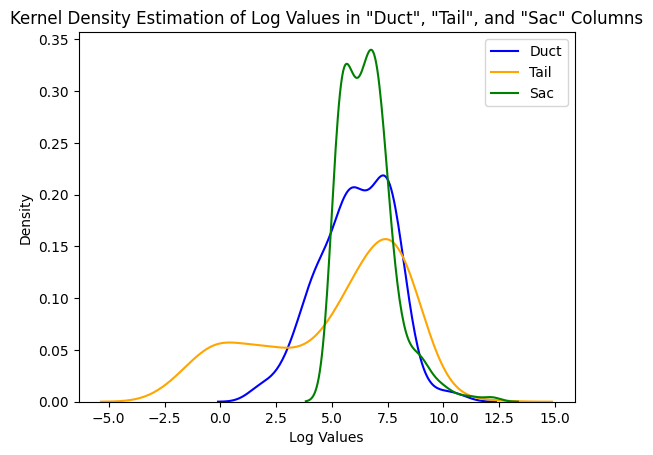

In [14]:

sac_log_threshold = 5
sac_log_high = data[data['sac_log'] > sac_log_threshold]

print(len(sac_log_high))

sns.kdeplot(data=sac_log_high['duct_log'], color='blue', label='Duct')
sns.kdeplot(data=sac_log_high['tail_log'], color='orange', label='Tail')
sns.kdeplot(data=sac_log_high['sac_log'], color='green', label='Sac')


plt.title('Kernel Density Estimation of Log Values in "Duct", "Tail", and "Sac" Columns')
plt.xlabel('Log Values')
plt.ylabel('Density')


plt.legend()
plt.show()



In [15]:
print(len(sac_log_high))
print(len(tail_log_high))

247
186


In [16]:
df_sac_tail = pd.merge(sac_log_high, tail_log_high, how='outer')


print(len(df_sac_tail))
df_sac_tail = df_sac_tail.drop_duplicates()

print(len(df_sac_tail))

279
279


In [17]:
print(len(df_sac_tail[df_sac_tail["Group"]=="Spice-LMa"]))
print(len(df_sac_tail[df_sac_tail["Group"]=="Spidroin"]))

6
10


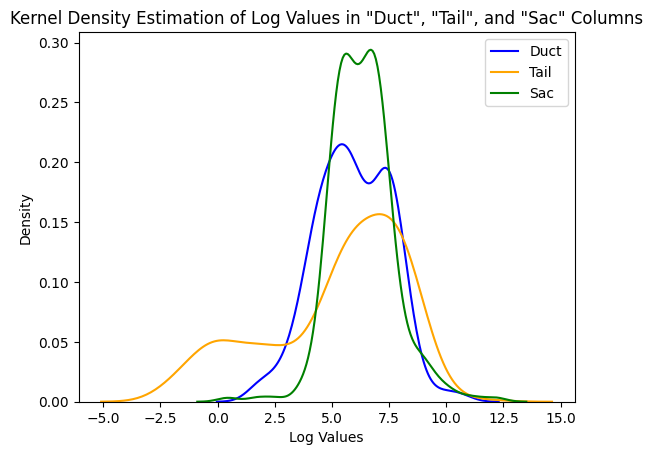

In [18]:
sns.kdeplot(data=df_sac_tail['duct_log'], color='blue', label='Duct')
sns.kdeplot(data=df_sac_tail['tail_log'], color='orange', label='Tail')
sns.kdeplot(data=df_sac_tail['sac_log'], color='green', label='Sac')


plt.title('Kernel Density Estimation of Log Values in "Duct", "Tail", and "Sac" Columns')
plt.xlabel('Log Values')
plt.ylabel('Density')


plt.legend()
plt.show()

In [21]:

common_indices = tail_log_higher_than_6.index.intersection(sac_log_higher_than_6.index)
common_rows_= tail_log_higher_than_6.loc[common_indices]


Remove NA values from df (the OG with no assosiation to bridgespider annotations. )

In [22]:
na_count_row3 = df.iloc[: , 7:-29].iloc[3].isna().sum()
print(na_count_row3)

columns_with_na_row3 = df.iloc[: , 7:-29].columns[df.iloc[: , 7:-29].iloc[3].isna()]
df_with_anno = df.drop(columns=columns_with_na_row3)

154797


In [24]:
df_sac_tail

,gene_id,geneName,lascID,product,uniprot_id,MajorParts,Body_FC,Body_padj,Gland_FC,Gland_padj,...,Selection,Duct,Major,Sac,Tail,geneNameProtein,Group,duct_log,tail_log,sac_log
0,augustus_masked-000031F-processed-gene-28.6,acp7,LASC004110,Acid phosphatase type 7,A5D6U8,Duct,1.070914,2.394206e-05,1.284837,0.125582,...,MajorSpecific,873.253308,806.862752,842.819496,341.803451,NaN,NaN,6.772226,5.834236,6.736753
1,augustus_masked-000043F-processed-gene-9.2,LASC004993,LASC004993,hypothetical protein,NaN,Duct,6.991497,7.516849e-27,2.182390,0.030081,...,MajorSpecific,841.053778,460.140854,554.299274,1.171070,NaN,NaN,6.734656,0.157918,6.317705
2,augustus_masked-000088F-processed-gene-12.10,nifk,LASC008425,MKI67 FHA domain-interacting nucleolar phospho...,Q6GL69,Tail,0.530167,4.176563e-03,1.342355,0.000003,...,MajorSpecific,892.300533,506.885008,305.323485,538.680256,NaN,NaN,6.793803,6.289122,5.721372
3,evm-000189F-processed-gene-4.0,LASC013597,LASC013597,hypothetical protein,NaN,Duct,5.084867,1.891050e-27,3.838502,0.000580,...,MajorSpecific,7385.100685,928.777437,236.864312,15.841639,NaN,NaN,8.907220,2.762642,5.467487
4,evm-000259F-processed-gene-7.3,hpgd_14,LASC016265,15-hydroxyprostaglandin dehydrogenase [NAD(+)],P70684,Duct,5.758038,9.054320e-26,3.747892,0.003855,...,MajorSpecific,4903.172327,878.143836,374.724392,14.780496,NaN,NaN,8.497638,2.693308,5.926191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,augustus_masked-000308F-processed-gene-7.0,LASC017685,NaN,hypothetical protein,NaN,Tail,1.125550,1.165545e-02,0.581037,0.321628,...,MajorSpecific,183.803324,218.403740,110.723652,491.566960,NaN,NaN,5.213866,6.197598,4.707037
275,maker-000008F-exonerate_protein2genome-gene-50.3,cpa_3,NaN,F-actin-capping protein subunit alpha,NaN,Tail,0.445555,6.516640e-03,0.468858,0.083902,...,MajorSpecific,211.028394,204.936706,130.235218,276.201685,NaN,NaN,5.351993,5.621131,4.869342
276,maker-000018F-est_gff_StringTie-gene-21.4,roc1a,NaN,RING-box protein 1A,NaN,Tail,0.108429,4.123100e-01,0.715271,0.012618,...,MajorSpecific,149.896467,149.190320,111.110168,207.482407,NaN,NaN,5.009945,5.335047,4.710522
277,maker-000022F-exonerate_protein2genome-gene-48.2,exosc1,NaN,Exosome complex component CSL4,NaN,Tail,0.955946,1.152457e-08,0.739409,0.017415,...,MajorSpecific,90.623700,76.217778,40.052493,159.472932,NaN,NaN,4.506716,5.071874,3.690191


In [39]:
df_with_anno

,Orthogroup,ID,idv_id,DRR,species,Genus,Family,OG0000000,OG0000001,OG0000002,...,OG0001853,OG0002663,OG0002778,OG0003877,OG0004997,OG0007111,OG0007640,OG0008237,OG0009283,OG0010900
0,Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Spidroin,Spidroin,Spidroin,Spidroin,Spidroin,Spidroin,Spidroin,Spidroin,Spidroin,Spidroin
1,geneName,NaN,NaN,NaN,NaN,NaN,NaN,"znf345_znf71_znf133_znf227_znf84,znf227_znf345...","tdpoz1_8,tdpoz5_7,spopl_2,tdpoz1_10,spopla_2,s...","LASC000900,LASC000902,LASC000903,LASC000906,LA...",...,MiSpd,"FlSpa,FlSpb,FlSpc",Spidroin3,AcSpa,"PySpa,PySpb",Spidroin2,Spidroin1,TuSpc,TuSp-like,MiSpa
2,product,NaN,NaN,NaN,NaN,NaN,NaN,Endothelial zinc finger protein induced by tum...,"TD and POZ domain-containing protein 1,hypothe...",hypothetical protein,...,"Minor, ampullate, spidroin, 1, variant, 2, (Fr...","Flagelliform spidroin variant 2 (Fragment),Fla...","Uncharacterized, protein, (Fragment)","Aciniform, spidroin, 1, variant, 3, (Fragment)","Pyriform, spidroin, 1, variant, 1, (Fragment)",Sp-8175#PRD27848.1 protein,hypothetical protein,Tubuliform spidroin 1 variant 1 (Fragment),"hypothetical, protein","hypothetical, protein"
3,lascID,NaN,NaN,NaN,NaN,NaN,NaN,"LASC000575,LASC000643,LASC000881,LASC001039,LA...","LASC000830,LASC000860,LASC000861,LASC000862,LA...","LASC000900,LASC000902,LASC000903,LASC000906,LA...",...,LASC022495,"LASC007997,LASC013942,LASC013944",LASC020272,LASC004415,"LASC011790,LASC011791",LASC004216,LASC000723,LASC022086,LASC001804,LASC007254
4,0,101-W7_S13,101.0,DRR296821,pilipes,Nephila,Araneidae,448.347538,506.277029,860.212339,...,0.0,0.0,0.0,2.512459,159.572998,528.356259,0.0,7.209028,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,286,7441-W1_S4,7441.0,DRR168617,inaurata,Trichonephila,Araneidae,750.743285,665.369524,983.899702,...,0.0,218.127906,2.559518,0.0,174.900337,17.892451,18.647915,25.710518,0.0,0.0
291,287,7447-W1_S14,7447.0,DRR168618,geometricus,Latrodectus,Theridiidae,208.459675,178.93683,31.317743,...,0.7981,1.056308,1.971776,0.0,714.353258,126.674137,0.0,332.255914,0.0,0.0
292,288,7452-W1_S16,7452.0,DRR168637,-,Peucetia,Oxyopidae,599.385955,248.81701,10.07037,...,0.0,0.0,0.0,0.0,517.967821,0.0,0.0,207.187588,0.0,0.0
293,289,7607-W1_S14,7607.0,DRR221432,spinimana,Zoropsis,Zoropsidae,1102.267153,45.34049,0.0,...,0.0,0.0,0.0,0.0,1.323346,0.0,0.0,0.0,0.0,0.0


In [40]:

sac_tail_matching_columns = df_with_anno.columns[df_with_anno.iloc[3].astype(str).str.contains('|'.join(map(str, df_sac_tail['lascID'])))]
sac_tail_a_list= list(sac_tail_matching_columns)

print("Columns where values are found:", len(sac_tail_a_list))

Columns where values are found: 497


In [26]:
sac_tail_unique_gland_col = pd.Series(sac_tail_a_list).unique()
sac_tail_df_gland_og = pd.concat([df_with_anno.iloc[:, :7], df_with_anno[sac_tail_unique_gland_col].iloc[:, 6:]], axis=1)

In [27]:
columns_with_spiCE = sac_tail_df_gland_og.columns[sac_tail_df_gland_og.iloc[0] == 'SpiCE']
sac_tail_df_gland_og[columns_with_spiCE].iloc[1]

OG0000264    Spice_3,Spice_4,Spice_5,Spice_6,Spice_2,Spice_...
Name: 1, dtype: object

In [28]:

columns_with_spidroin = sac_tail_df_gland_og.columns[sac_tail_df_gland_og.iloc[0] == 'Spidroin']
sac_tail_df_gland_og[columns_with_spidroin].iloc[1]

OG0000050    MaSp4,MaSp2a,MaSp2b,MaSp2c,MaSp1a,MaSp1b,MaSp1...
OG0002778                                            Spidroin3
OG0007640                                            Spidroin1
Name: 1, dtype: object

In [29]:
sac_matching_columns = df_with_anno.columns[df_with_anno.iloc[3].astype(str).str.contains('|'.join(map(str, sac_log_high['lascID'])))]
sac_a_list= list(sac_matching_columns)

print("Columns where values are found:", len(sac_a_list))

Columns where values are found: 185


In [30]:
sac_unique_gland_col = pd.Series(sac_a_list).unique()
sac_df_gland_og = pd.concat([df_with_anno.iloc[:, :7], df_with_anno[sac_unique_gland_col].iloc[:, 6:]], axis=1)

In [31]:
tail_matching_columns = df_with_anno.columns[df_with_anno.iloc[3].astype(str).str.contains('|'.join(map(str, tail_log_high['lascID'])))]
tail_a_list= list(tail_matching_columns)

print("Columns where values are found:", len(tail_a_list))

Columns where values are found: 137


In [32]:
tail_unique_gland_col = pd.Series(tail_a_list).unique()
tail_df_gland_og = pd.concat([df_with_anno.iloc[:, :7], df_with_anno[tail_unique_gland_col].iloc[:, 6:]], axis=1)

In [1]:
matching_columns = df_with_anno.columns[df_with_anno.iloc[3].astype(str).str.contains('|'.join(map(str, data['lascID'])))]
a_list= list(matching_columns)
a_list

print("Columns where values are found:", len(a_list))

NameError: name 'df_with_anno' is not defined

In [34]:
unique_gland_col = pd.Series(a_list).unique()
df_gland_og = pd.concat([df_with_anno.iloc[:, :7], df_with_anno[unique_gland_col].iloc[:, 6:]], axis=1)

In [35]:
tail_df_gland_og 

,Orthogroup,ID,idv_id,DRR,species,Genus,Family,OG0000022,OG0000081,OG0000122,...,OG0014767,OG0015293,OG0015566,OG0015631,OG0018677,OG0019335,OG0036622,OG0064434,OG0077064,OG0000050
0,Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spidroin
1,geneName,NaN,NaN,NaN,NaN,NaN,NaN,"LASC002598,LASC010177,LASC010178,LASC010181,LA...","dhrs11_12,dhrs11_3,dhrs11_14,dhrs11_6,dhrs11_1...","nedd8,rpl40",...,tmem167a,rpl29,LASC016455,LASC005801,"sec61g,sec61g_2",atox1,rps29,nupr1,rps28,"MaSp4,MaSp2a,MaSp2b,MaSp2c,MaSp1a,MaSp1b,MaSp1..."
2,product,NaN,NaN,NaN,NaN,NaN,NaN,hypothetical protein,Dehydrogenase/reductase SDR family member 11,"NEDD8,Ubiquitin-60S ribosomal protein L40",...,Protein kish-A,60S ribosomal protein L29,hypothetical protein,hypothetical protein,Protein transport protein Sec61 subunit gamma,Copper transport protein ATOX1,40S ribosomal protein S29,Nuclear protein 1,40S ribosomal protein S28,"MaSp-f(1)#PRD27696.1, protein,Major, ampullate..."
3,lascID,NaN,NaN,NaN,NaN,NaN,NaN,"LASC002598,LASC010177,LASC010178,LASC010181,LA...","LASC000060,LASC000061,LASC000062,LASC000063,LA...","LASC017896,LASC020862",...,LASC013006,LASC010551,LASC016455,LASC005801,"LASC009213,LASC018734",LASC018096,LASC006126,LASC009277,LASC009353,"LASC004263,LASC004265,LASC004267,LASC004269,LA..."
4,0,101-W7_S13,101.0,DRR296821,pilipes,Nephila,Araneidae,399.6388,544.5224,830.39941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.28781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,286,7441-W1_S4,7441.0,DRR168617,inaurata,Trichonephila,Araneidae,667.7755,882.725326,1794.439186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1331.255181
291,287,7447-W1_S14,7447.0,DRR168618,geometricus,Latrodectus,Theridiidae,102.844972,312.955,1238.292962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1646.226634
292,288,7452-W1_S16,7452.0,DRR168637,-,Peucetia,Oxyopidae,29.67863,926.47954,1011.849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3415.859989
293,289,7607-W1_S14,7607.0,DRR221432,spinimana,Zoropsis,Zoropsidae,197.371427,1798.4761,1422.176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.295906


In [36]:
sac_tail_df_gland_og

,Orthogroup,ID,idv_id,DRR,species,Genus,Family,OG0000013,OG0000022,OG0000031,...,OG0018275,OG0018677,OG0019335,OG0036622,OG0064434,OG0077064,OG0099269,OG0000050,OG0002778,OG0007640
0,Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spidroin,Spidroin,Spidroin
1,geneName,NaN,NaN,NaN,NaN,NaN,NaN,"cyp4c3_3,cyp4v2_cyp4c3_5,cyp4v2_23,cyp4v2_3,cy...","LASC002598,LASC010177,LASC010178,LASC010181,LA...","jhamt_16,LASC005293,jhamt_8,jhamt_11,jhamt_5,j...",...,LASC007099,"sec61g,sec61g_2",atox1,rps29,nupr1,rps28,LASC018186,"MaSp4,MaSp2a,MaSp2b,MaSp2c,MaSp1a,MaSp1b,MaSp1...",Spidroin3,Spidroin1
2,product,NaN,NaN,NaN,NaN,NaN,NaN,"Cytochrome P450 4c3,Cytochrome P450 4V2,Cytoch...",hypothetical protein,"Juvenile hormone acid O-methyltransferase,hypo...",...,hypothetical protein,Protein transport protein Sec61 subunit gamma,Copper transport protein ATOX1,40S ribosomal protein S29,Nuclear protein 1,40S ribosomal protein S28,hypothetical protein,"MaSp-f(1)#PRD27696.1, protein,Major, ampullate...","Uncharacterized, protein, (Fragment)",hypothetical protein
3,lascID,NaN,NaN,NaN,NaN,NaN,NaN,"LASC003001,LASC003994,LASC003995,LASC005732,LA...","LASC002598,LASC010177,LASC010178,LASC010181,LA...","LASC005289,LASC005293,LASC007879,LASC007882,LA...",...,LASC007099,"LASC009213,LASC018734",LASC018096,LASC006126,LASC009277,LASC009353,LASC018186,"LASC004263,LASC004265,LASC004267,LASC004269,LA...",LASC020272,LASC000723
4,0,101-W7_S13,101.0,DRR296821,pilipes,Nephila,Araneidae,268.03263,399.6388,1014.23443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.28781,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,286,7441-W1_S4,7441.0,DRR168617,inaurata,Trichonephila,Araneidae,303.338546,667.7755,526.17529,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1331.255181,2.559518,18.647915
291,287,7447-W1_S14,7447.0,DRR168618,geometricus,Latrodectus,Theridiidae,340.32814,102.844972,73.78578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1646.226634,1.971776,0.0
292,288,7452-W1_S16,7452.0,DRR168637,-,Peucetia,Oxyopidae,317.51919,29.67863,93.2963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3415.859989,0.0,0.0
293,289,7607-W1_S14,7607.0,DRR221432,spinimana,Zoropsis,Zoropsidae,240.436842,197.371427,35.31681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.295906,0.0,0.0


In [37]:
# df_gland_og.to_csv("C:/Users/46705/Documents/SpiderSilk/data/pre_filtering/gland_og.csv", index = False)

sac_tail_df_gland_og.to_csv("C:/Users/46705/Documents/SpiderSilk/data/pre_filtering/max_tail_sac_5_og_log.csv", index = False)


In [38]:

# tail_df_gland_og.to_csv("C:/Users/46705/Documents/SpiderSilk/data/pre_filtering/tail_gland_og.csv", index = False)

# sac_df_gland_og.to_csv("C:/Users/46705/Documents/SpiderSilk/data/pre_filtering/sac_gland_og.csv", index = False)